In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import os
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats 

In [154]:
def load_data():
    mean = 5
    std_dev = 1
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
    x_train, x_test = train_test_split(x, train_size=0.8, random_state=10)
    y_train = (x_train>6).astype(int)
    y_test = (x_test>6).astype(int)

    x_train = np.reshape(x_train, (x_train.shape[0], 1))
    y_train = np.reshape(y_train, (y_train.shape[0], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], 1))
    y_test = np.reshape(y_test, (y_test.shape[0], 1))

    data = {'x_train':x_train, 'y_train':y_train, 'x_test':x_test, 'y_test':y_test}
    return data

In [4]:
def sigmoid(z):
    a = 1/(1 + np.exp(-z))
    return a

In [5]:
def forward_prop(x, params):
    w, b = params['w'], params['b']
    z = np.matmul(x, w) + b
    inter_vals = {'z':z}
    yhat = sigmoid(z)
    return yhat, inter_vals

In [6]:
def calculate_cost(yhat, y):
    m = y.shape[0]
    losses = (y * np.log(yhat)) + ((1 - y) * np.log(1 - yhat))
    cost = -np.sum(losses, axis=0, keepdims=True)/m
    return cost

In [57]:
def back_prop(x, yhat, y, inter_vals):
    m = y.shape[0]
    z = inter_vals['z']
    dc_dyhat = (-1/m) * ((y/yhat) - ((1-y)/(1-yhat)))
    dyhat_dz = sigmoid(z) * (1 - sigmoid(z))
    dz_dc = dyhat_dz * dc_dyhat
    dw_dc = np.sum(dz_dc * x, axis=0, keepdims=True)
    db_dc = np.sum(dz_dc, axis=0, keepdims=True)
    assert dw_dc.shape == (1,1)
    assert db_dc.shape == (1,1)
    grads = {'dw':dw_dc, 'db':db_dc}
    return grads

In [58]:
def update_params(params, grads, lr):
    w = params['w']
    b = params['b']
    dw = grads['dw']
    db = grads['db']
    w = w - lr * dw
    b = b - lr * db
    new_params = {'w':w,'b':b}
    return new_params

In [109]:
def save_params(model, params):
    path = '../src/models/' + model
    for p in params:
        param_path = path + '/' + p + '.npy'
        np.save(param_path, params[p])

In [175]:
def load_params(model, logging):
    w = np.random.rand(1,1) * 0.1
    b = np.zeros((1,1))
    params = {'w':w,'b':b}
    path = '../src/models/' + model

    if not os.path.exists(path):
        os.makedirs(path)
        if(logging):
            print(f'created new model {model}')
        return params
    else:
        for p in params:
            try: 
                param_path = path + '/' + p + '.npy'
                params[p] = np.load(param_path)
                if(logging):
                    print(f'loaded param {p} with value {params[p]}')
            except FileNotFoundError:
                pass

    return params

In [176]:
def train(model, data, epochs, lr, logging):
    x_train = data['x_train']
    y_train = data['y_train']
    params = load_params(model, logging)
    for epoch in range(epochs):
        yhat, inter_vals = forward_prop(x_train, params)
        cost = calculate_cost(yhat, y_train)
        grads = back_prop(x_train, yhat, y_train, inter_vals)
        params = update_params(params, grads, lr)
        if(logging):
            print(f'epoch {epoch} cost {cost}')
    save_params(model, params)
    if(logging):
        print(f'params {params}')

In [179]:
model = 'model5'
epochs = 100
lr = 0.3
logging = True


data = load_data()
train(model, data, epochs, lr, logging)

loaded param w with value [[0.08901133]]
loaded param b with value [[-0.04514676]]
epoch 0 cost [[0.67218144]]
epoch 1 cost [[0.66458824]]
epoch 2 cost [[0.65839766]]
epoch 3 cost [[0.65308042]]
epoch 4 cost [[0.65131547]]
epoch 5 cost [[0.6492842]]
epoch 6 cost [[0.65611581]]
epoch 7 cost [[0.65467974]]
epoch 8 cost [[0.67311002]]
epoch 9 cost [[0.66101686]]
epoch 10 cost [[0.68774338]]
epoch 11 cost [[0.6568323]]
epoch 12 cost [[0.68592926]]
epoch 13 cost [[0.6437284]]
epoch 14 cost [[0.67209635]]
epoch 15 cost [[0.62770948]]
epoch 16 cost [[0.6543133]]
epoch 17 cost [[0.61136435]]
epoch 18 cost [[0.63585999]]
epoch 19 cost [[0.59538457]]
epoch 20 cost [[0.61763607]]
epoch 21 cost [[0.57992929]]
epoch 22 cost [[0.59987976]]
epoch 23 cost [[0.56502554]]
epoch 24 cost [[0.58266261]]
epoch 25 cost [[0.55066741]]
epoch 26 cost [[0.56601261]]
epoch 27 cost [[0.53684123]]
epoch 28 cost [[0.5499456]]
epoch 29 cost [[0.52353253]]
epoch 30 cost [[0.53447394]]
epoch 31 cost [[0.51072822]]
epoc

loaded param w with value [[0.58942218]]
loaded param b with value [[-3.19628105]]


(-0.5, 1.5)

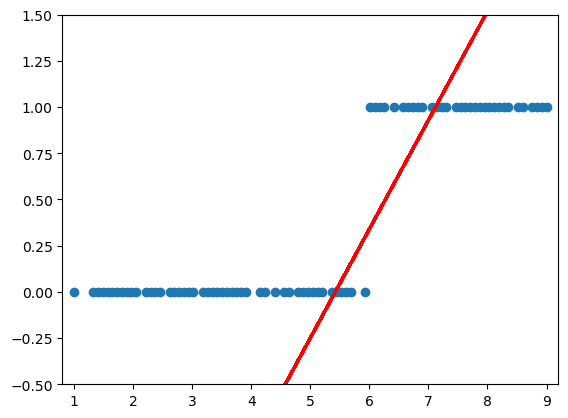

In [180]:
model = 'model5'
x = data['x_train']
y = data['y_train']
plt.scatter(x, y)
params = load_params(model, logging=True)
w = params['w']
b = params['b']
line = w*x + b
plt.plot(x, line, color='red', linestyle='-', linewidth=2, label='wx+b')
plt.xlim(0.8, 9.2)
plt.ylim(-0.5, 1.5)